Estancia de Investigación Dr. Pastor CIMAT Guanajuato
Junio 2019

Hairo Ulises Miranda Belmonte Cimat Monterrey

hairo.miranda@cimat.mx

Cimat Gto.

# CNN NLP

* Librerias

In [1]:
import numpy as np 
import pandas as pd 
import re # lidia con expresiones regulares
import nltk
import matplotlib.pyplot as plt   
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize # sentencia en palabras
from nltk.stem import SnowballStemmer # idioma steam
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm



from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
# Any results you write to the current directory are saved as output.
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score 


In [2]:
import numpy as np
import pylab as pl
from IPython.display import SVG
from os.path import join, exists, split
import os

from gensim.models import word2vec, KeyedVectors


from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, MaxPooling1D, Convolution1D, Embedding, GlobalMaxPooling1D
from keras.layers.merge import Concatenate
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

Using TensorFlow backend.


In [3]:
import os
import time
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import math

from sklearn.metrics import roc_curve, auc,  f1_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import keras
from sklearn import metrics
from keras.layers import Input, Embedding, Dense, Conv2D, MaxPool2D, Reshape, Flatten, Concatenate, Dropout, SpatialDropout1D, BatchNormalization, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D,CuDNNLSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Bidirectional, GlobalMaxPool1D, TimeDistributed
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

* Funciones pre-procesamiento

In [4]:
# con stemming
def review_to_words( raw_review ):
    # 1. Remover todo menos letras y comas        
    letters_only = re.sub('[^\w]\d*',  " ", raw_review) 
    # 2. convertir a mínusculas
    words = letters_only.lower().split()                             
    # 3. remover stopwords
    stops = set(stopwords.words("spanish"))                  
    # 3.1 retirando stopwords
    meaningful_words = [w for w in words if not w in stops]   
    # 4 stemming en español
    stemmer = SnowballStemmer('spanish')
    stemmed_text = [stemmer.stem(i) for i in meaningful_words]
    # 5. uniendo documeto
    return( " ".join( stemmed_text ))  
# sin stemming
def review_to_words2( raw_review ):
    # 1. Remover todo menos letras y comas       
    letters_only = re.sub('[^\w]\d*',  " ", raw_review) 
    # 2. convertir a mínusculas
    words = letters_only.lower().split()                             
    # 3. remover stopwords
    stops = set(stopwords.words("spanish"))                  
    # 3.1 retirando stopwords
    meaningful_words = [w for w in words if not w in stops]   
    return( " ".join( meaningful_words )) 

* Función W2Vec average

### Word2Vec Google

In [5]:
import gensim
from gensim.models import word2vec, KeyedVectors


from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, MaxPooling1D, Convolution1D, Embedding, GlobalMaxPooling1D
from keras.layers.merge import Concatenate
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

In [6]:
# Load Google's pre-trained Word2Vec model.
os.chdir('C:\\Users\\h_air\\Documents\\Diplomado Deep Learning\\Estancia\\Datos\\Datos\\word2vec Google news')
modelo_google = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)     

C:\Users\h_air\Anaconda3\envs\tensorflow-gpu\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


# México

In [7]:
# Importando los textos
import os
# introducit path datos de entrenamiento
os.chdir('C:\\Users\\h_air\\Documents\\Diplomado Deep Learning\\Estancia\\Datos\\Datos\\IberLEF19-IroSvA-training-20190331')
train = pd.read_csv('irosva.mx.training.csv');
# introducit path datos de prueba
os.chdir('C:\\Users\\h_air\\Documents\\Diplomado Deep Learning\\Estancia\\Datos\\Datos\\IberLEF19-IroSvA-test-20190420')
test_nolabel = pd.read_csv('irosva.mx - irosva.mx.test.csv');
# introducit path etiquetas verdaderas de prueba
os.chdir('C:\\Users\\h_air\\Documents\\Diplomado Deep Learning\\Estancia\\Datos\\Datos\\IberLEF19-IroSvA-test-truth-20190420')
test_label = pd.read_csv('irosva.mx.test.truth.csv');

test = pd.merge(test_nolabel, test_label, on='ID')
entrenamiento = train["TOPIC"].astype(str).str.cat(train["MESSAGE"].astype(str), sep=' ')
prueba = test["TOPIC_y"].astype(str).str.cat(test["MESSAGE"].astype(str), sep=' ')

x_train = train["MESSAGE"]
x_test = test["MESSAGE"]
y_train = train['IS_IRONIC']
y_test = test['IS_IRONIC_y']

#Limpiando datos de entrenamiento
num = x_train.size
# Lista para guardar twits limpios
clean_train = []
for i in range( 0, num):
    clean_train.append(review_to_words2(x_train.values[i]))
x_train_mx = clean_train

num= x_test.size
clean_test_train = []
for i in range( 0, num):
    clean_test_train.append( review_to_words2(x_test.values[i] ) )
x_test_mx = clean_test_train

x_train_mx = train["TOPIC"].astype(str).str.cat(x_train_mx, sep=' ')
x_test_mx = test["TOPIC_y"].astype(str).str.cat(x_test_mx, sep=' ')

x_test_mx# Datos de entrenamient y de prueba ya pre-procesados

x_train_mx = pd.Series(x_train_mx)
y_train = pd.Series(y_train)
x_test_mx = pd.Series(x_test_mx)
y_test = pd.Series(y_test)

print(x_train_mx.shape)
print(y_train.shape)
print(x_test_mx.shape)
print(y_test.shape)


(2400,)
(2400,)
(600,)
(600,)


* Pesos Word2vec Google, introducir a embedding de CNN

In [8]:
from pickle import load
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate


# fit a tokenizer
def create_tokenizer(lines):
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# calculate the maximum document length
def max_length(lines):
	return max([len(s.split()) for s in lines])

# encode a list of lines
def encode_text(tokenizer, lines, length):
	# integer encode
	encoded = tokenizer.texts_to_sequences(lines)
	# pad encoded sequences
	padded = pad_sequences(encoded, maxlen=length, padding='post')
	return padded


In [9]:
# create tokenizer
tokenizer_mx = create_tokenizer(x_train_mx)
# calculate max document length
length_mx = max_length(x_train_mx)
# calculate vocabulary size
vocab_size_mx = len(tokenizer_mx.word_index) + 1
print('Max document length México: %d' % length_mx)
print('Vocabulary size México: %d' % vocab_size_mx)

# encode data
trainX_mx = encode_text(tokenizer_mx, x_train_mx, length_mx)
print(trainX_mx.shape)


testX_mx = encode_text(tokenizer_mx, x_test_mx, length_mx)
print(testX_mx.shape)

Max document length México: 36
Vocabulary size México: 8281
(2400, 36)
(600, 36)


In [10]:
tokenizer_mx.word_index
vocabulary_inv_mx = dict((v, k) for k, v in tokenizer_mx.word_index.items())
vocabulary_inv_mx[0] = "<PAD/>"


In [11]:
# pesos 
embedding_weights_mx = {key: modelo_google[word] if word in modelo_google else
                          np.random.uniform(-0.25, 0.25, modelo_google.vector_size)
                     for key, word in vocabulary_inv_mx.items()}

In [12]:
weights_mx = np.array([embedding_weights_mx[i] for i in range(len(embedding_weights_mx))])

# España

In [13]:
# Importando los textos
import os
# introducit path datos de entrenamiento
os.chdir('C:\\Users\\h_air\\Documents\\Diplomado Deep Learning\\Estancia\\Datos\\Datos\\IberLEF19-IroSvA-training-20190331')
train_es = pd.read_csv('irosva.es.training.csv');
# introducit path datos de prueba
os.chdir('C:\\Users\\h_air\\Documents\\Diplomado Deep Learning\\Estancia\\Datos\\Datos\\IberLEF19-IroSvA-test-20190420')
test_nolabel_es = pd.read_csv('irosva.es - irosva.es.test.csv');
# introducit path etiquetas verdaderas de prueba
os.chdir('C:\\Users\\h_air\\Documents\\Diplomado Deep Learning\\Estancia\\Datos\\Datos\\IberLEF19-IroSvA-test-truth-20190420')
test_label_es = pd.read_csv('irosva.es.test.truth.csv');

test_es = pd.merge(test_nolabel_es, test_label_es, on='ID')

x_train_es = train_es["MESSAGE"]
x_test_es = test_es["MESSAGE"]
y_train_es = train_es['IS_IRONIC']
y_test_es = test_es['IS_IRONIC_y']

#Limpiando datos de entrenamiento
num = x_train_es.size
# Lista para guardar twits limpios
clean_train = []
for i in range( 0, num):
    clean_train.append(review_to_words(x_train_es.values[i]))
x_train_es = clean_train

num= x_test_es.size
clean_test_train = []
for i in range( 0, num):
    clean_test_train.append( review_to_words(x_test_es.values[i] ) )
x_test_es= clean_test_train

x_train_es = train_es["TOPIC"].astype(str).str.cat(x_train_es, sep=' ')
x_test_es = test_es["TOPIC_y"].astype(str).str.cat(x_test_es, sep=' ')

x_test_mx# Datos de entrenamient y de prueba ya pre-procesados

x_train_es= pd.Series(x_train_es)
y_train_es = pd.Series(y_train_es)
x_test_es = pd.Series(x_test_es)
y_test_es = pd.Series(y_test_es)

print(x_train_es.shape)
print(y_train_es.shape)
print(x_test_es.shape)
print(y_test_es.shape)


(2400,)
(2400,)
(600,)
(600,)


In [14]:
# create tokenizer
tokenizer_es = create_tokenizer(x_train_es)
# calculate max document length
length_es = max_length(x_train_es)
# calculate vocabulary size
vocab_size_es = len(tokenizer_es.word_index) + 1
print('Max document length España: %d' % length_es)
print('Vocabulary size España: %d' % vocab_size_es)

# encode data
trainX_es = encode_text(tokenizer_es, x_train_es, length_es)
print(trainX_es.shape)


testX_es = encode_text(tokenizer_es, x_test_es, length_es)
print(testX_es.shape)

tokenizer_es.word_index
vocabulary_inv_es = dict((v, k) for k, v in tokenizer_es.word_index.items())
vocabulary_inv_es[0] = "<PAD/>"

# pesos 
embedding_weights_es = {key: modelo_google[word] if word in modelo_google else
                          np.random.uniform(-0.25, 0.25, modelo_google.vector_size)
                     for key, word in vocabulary_inv_es.items()}

weights_es = np.array([embedding_weights_es[i] for i in range(len(embedding_weights_es))])

Max document length España: 38
Vocabulary size España: 6995
(2400, 38)
(600, 38)


# Cuba

In [15]:
# Importando los textos
import os
# introducit path datos de entrenamiento
os.chdir('C:\\Users\\h_air\\Documents\\Diplomado Deep Learning\\Estancia\\Datos\\Datos\\IberLEF19-IroSvA-training-20190331')
train_cu = pd.read_csv('irosva.cu.training.csv');
# introducit path datos de prueba
os.chdir('C:\\Users\\h_air\\Documents\\Diplomado Deep Learning\\Estancia\\Datos\\Datos\\IberLEF19-IroSvA-test-20190420')
test_nolabel_cu = pd.read_csv('irosva.cu - irosva.cu.test.csv');
# introducit path etiquetas verdaderas de prueba
os.chdir('C:\\Users\\h_air\\Documents\\Diplomado Deep Learning\\Estancia\\Datos\\Datos\\IberLEF19-IroSvA-test-truth-20190420')
test_label_cu = pd.read_csv('irosva.cu.test.truth.csv');

test_cu = pd.merge(test_nolabel_cu, test_label_cu, on='ID')

x_train_cu = train_cu["MESSAGE"]
x_test_cu = test_cu["MESSAGE"]
y_train_cu = train_cu['IS_IRONIC']
y_test_cu = test_cu['IS_IRONIC_y']

#Limpiando datos de entrenamiento
num = x_train_cu.size
# Lista para guardar twits limpios
clean_train = []
for i in range( 0, num):
    clean_train.append(review_to_words2(x_train_cu.values[i]))
x_train_cu = clean_train

num= x_test_cu.size
clean_test_train = []
for i in range( 0, num):
    clean_test_train.append( review_to_words2(x_test_cu.values[i] ) )
x_test_cu= clean_test_train

x_train_cu = train_cu["TOPIC"].astype(str).str.cat(x_train_cu, sep=' ')
x_test_cu = test_cu["TOPIC_y"].astype(str).str.cat(x_test_cu, sep=' ')

x_test_mx# Datos de entrenamient y de prueba ya pre-procesados

x_train_cu= pd.Series(x_train_cu)
y_train_cu = pd.Series(y_train_cu)
x_test_cu = pd.Series(x_test_cu)
y_test_cu = pd.Series(y_test_cu)

print(x_train_cu.shape)
print(y_train_cu.shape)
print(x_test_cu.shape)
print(y_test_cu.shape)


(2400,)
(2400,)
(600,)
(600,)


In [16]:
# create tokenizer
tokenizer_cu = create_tokenizer(x_train_cu)
# calculate max document length
length_cu = max_length(x_train_cu)
# calculate vocabulary size
vocab_size_cu = len(tokenizer_cu.word_index) + 1
print('Max document length Cuba: %d' % length_cu)
print('Vocabulary size Cuba: %d' % vocab_size_cu)

# encode data
trainX_cu = encode_text(tokenizer_cu, x_train_cu, length_cu)
print(trainX_cu.shape)


testX_cu = encode_text(tokenizer_cu, x_test_cu, length_cu)
print(testX_cu.shape)

tokenizer_cu.word_index
vocabulary_inv_cu = dict((v, k) for k, v in tokenizer_cu.word_index.items())
vocabulary_inv_cu[0] = "<PAD/>"

# pesos 
embedding_weights_cu = {key: modelo_google[word] if word in modelo_google else
                          np.random.uniform(-0.25, 0.25, modelo_google.vector_size)
                     for key, word in vocabulary_inv_cu.items()}

weights_cu = np.array([embedding_weights_cu[i] for i in range(len(embedding_weights_cu))])

Max document length Cuba: 41
Vocabulary size Cuba: 9304
(2400, 41)
(600, 41)


### Clasificación CNN México

In [17]:
# one hot representación targets
from keras.utils import to_categorical
y_train_label_mx = to_categorical(y_train)
y_test_label_mx  = to_categorical(y_test)

* Arquitectura CNN

In [18]:
# define the model
def define_model_mx1(length, vocab_size, n ):
    


	# channel 1
	np.random.seed(n)
	inputs1 = Input(shape=(length,))
	embedding1 = Embedding(vocab_size, 300)(inputs1)
	conv1 = Conv1D(filters=100, kernel_size=4, activation='relu')(embedding1)
	pool1 = GlobalMaxPooling1D()(conv1)
	drop1 = Dropout(0.5)(pool1) 
	# channel 2
	np.random.seed(n)
	inputs2 = Input(shape=(length,))
	embedding2 = Embedding(vocab_size, 300)(inputs2)   
	conv2 = Conv1D(filters=100, kernel_size=6, activation='relu')(embedding2)
	pool2 = GlobalMaxPooling1D()(conv2)
	drop2 = Dropout(0.5)(pool2) 
	# channel 3
	np.random.seed(n)
	inputs3 = Input(shape=(length,))
	embedding3 = Embedding(vocab_size, 300)(inputs3)   
	conv3 = Conv1D(filters=100, kernel_size=8, activation='relu')(embedding3)
	pool3 = GlobalMaxPooling1D()(conv3)
	drop3 = Dropout(0.5)(pool3) 
	# merge
	merged = concatenate([pool1, pool2, pool3])
	# interpretation
	dense1 = Dense(10, activation='relu')(merged)
	outputs = Dense(2, activation='softmax')(dense1)
	model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
	# compile
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# summarize
	print(model.summary())
	
	return model

In [58]:
del model_mx, hist_mx

In [60]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(array(y_train_label_mx)),
                                                 y_train)



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_28 (InputLayer)           (None, 36)           0                                            
__________________________________________________________________________________________________
input_29 (InputLayer)           (None, 36)           0                                            
__________________________________________________________________________________________________
input_30 (InputLayer)           (None, 36)           0                                            
__________________________________________________________________________________________________
embedding_28 (Embedding)        (None, 36, 300)      2484300     input_28[0][0]                   
__________________________________________________________________________________________________
embedding_

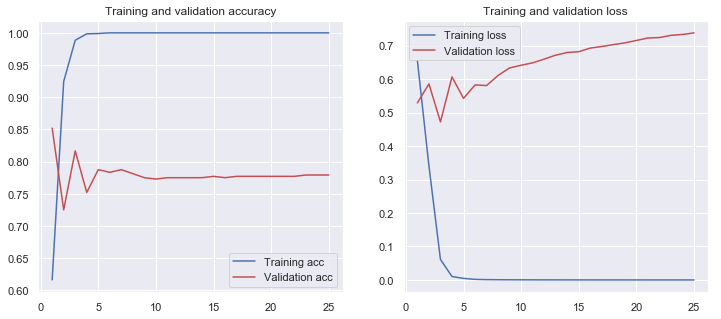

In [61]:
model_mx = define_model_mx1(length_mx, vocab_size_mx, 17) 
# fit model


hist_mx = model_mx.fit([trainX_mx,trainX_mx,trainX_mx], array(y_train_label_mx), epochs=25, batch_size=50, validation_split=.2,  class_weight=class_weights)

def plot_history(history):
        acc = history.history["acc"]
        val_acc = history.history["val_acc"]
        loss = history.history["loss"]
        val_loss = history.history["val_loss"]
        x = range(1, len(acc) + 1)

        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(x, acc, "b", label="Training acc")
        plt.plot(x, val_acc, "r", label="Validation acc")
        plt.title("Training and validation accuracy")
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.plot(x, loss, "b", label="Training loss")
        plt.plot(x, val_loss, "r", label="Validation loss")
        plt.title("Training and validation loss")
        plt.legend()
    
plot_history(history=hist_mx)


In [62]:
model_mx.evaluate([testX_mx,testX_mx,testX_mx],y_test_label_mx)

600/600 [==============================] - 0s 108us/step


[1.3451624313990276, 0.6933333333333334]

[[327  74]
 [110  89]]
F1 test: 0.6360711507271983


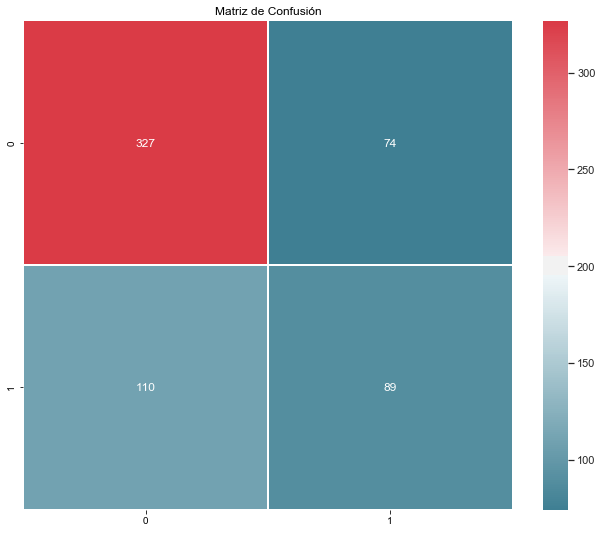

In [19]:
##########################
# Tabla de confusión
##########################
from sklearn.metrics import confusion_matrix, precision_score, recall_score 
from sklearn.metrics import f1_score, cohen_kappa_score
import seaborn as sns 

y_predict_mx = model_mx.predict([testX_mx,testX_mx,testX_mx])

test_true_labels_mx      = np.argmax(y_test_label_mx, axis=1)
test_predicted_labels_mx = np.argmax(y_predict_mx,axis=1)


%matplotlib inline
C = confusion_matrix(test_true_labels_mx, test_predicted_labels_mx)
print(C)

##########################
# F1
##########################
print('F1 test:', f1_score(test_true_labels_mx, test_predicted_labels_mx,  average='macro'))


f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(C, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Matriz de Confusión')
plt.show()

# con 25 epocas y seed 17 

#[[327  74]
# [110  89]]
#F1 test:0.6360711507271983

In [18]:
from keras.models import load_model
DATA_PATH='C:\\Users\\h_air\\Documents\\Diplomado Deep Learning\\Estancia\\Datos\\Datos\\'
#model_mx.save(DATA_PATH+'Cnn_mx.h5')

model_mx = load_model(DATA_PATH+'Cnn_mx.h5') # Cargar

W0710 10:59:44.147166  8800 deprecation_wrapper.py:119] From C:\Users\h_air\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0710 10:59:45.088257  8800 deprecation_wrapper.py:119] From C:\Users\h_air\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0710 10:59:45.938836  8800 deprecation_wrapper.py:119] From C:\Users\h_air\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0710 10:59:45.939798  8800 deprecation_wrapper.py:119] From C:\Users\h_air\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigPro

In [70]:
from keras.utils.vis_utils import plot_model
plot_model(model_mx, show_shapes=True, to_file=DATA_PATH+'Cnn_mx.png')


### Clasificación CNN España

In [20]:
# one hot representación targets
from keras.utils import to_categorical
y_train_label_es = to_categorical(y_train_es)
y_test_label_es  = to_categorical(y_test_es)

In [21]:
# define the model
def define_model_es1(length, vocab_size, n ):
    


	# channel 1
	np.random.seed(n)
	inputs1 = Input(shape=(length,))
	embedding1 = Embedding(vocab_size, 300)(inputs1)
	conv1 = Conv1D(filters=100, kernel_size=4, activation='relu')(embedding1)
	pool1 = GlobalMaxPooling1D()(conv1)
	drop1 = Dropout(0.5)(pool1) 
	# channel 2
	np.random.seed(n)
	inputs2 = Input(shape=(length,))
	embedding2 = Embedding(vocab_size, 300)(inputs2)   
	conv2 = Conv1D(filters=100, kernel_size=6, activation='relu')(embedding2)
	pool2 = GlobalMaxPooling1D()(conv2)
	drop2 = Dropout(0.5)(pool2) 
	# channel 3
	np.random.seed(n)
	inputs3 = Input(shape=(length,))
	embedding3 = Embedding(vocab_size, 300)(inputs3)   
	conv3 = Conv1D(filters=100, kernel_size=8, activation='relu')(embedding3)
	pool3 = GlobalMaxPooling1D()(conv3)
	drop3 = Dropout(0.5)(pool3) 
	# merge
	merged = concatenate([pool1, pool2, pool3])
	# interpretation
	dense1 = Dense(10, activation='relu')(merged)
	outputs = Dense(2, activation='softmax')(dense1)
	model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
	# compile
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# summarize
	print(model.summary())
	
	return model

In [24]:
from sklearn.utils import class_weight
class_weights_es = class_weight.compute_class_weight('balanced',
                                                 np.unique(array(y_train_label_es)),
                                                 y_train_es)

In [112]:
del model_es, hist_es

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 38)           0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            (None, 38)           0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            (None, 38)           0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 38, 300)      2098500     input_7[0][0]                    
__________________________________________________________________________________________________
embedding_

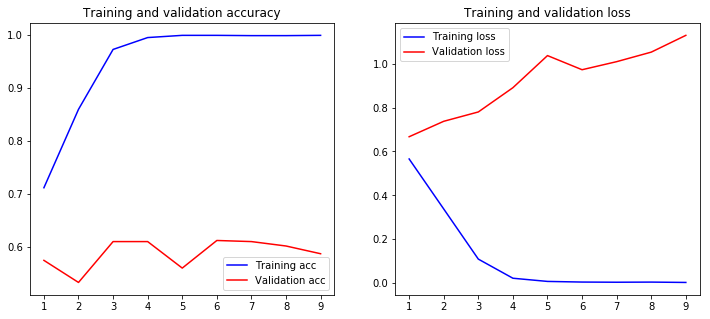

In [26]:
model_es = define_model_es1(length_es, vocab_size_es, 16) #16
# fit model


hist_es = model_es.fit([trainX_es,trainX_es,trainX_es], array(y_train_label_es), epochs=9, batch_size=50, validation_split=.2, 
                      class_weight = class_weights_es)

def plot_history(history):
        acc = history.history["acc"]
        val_acc = history.history["val_acc"]
        loss = history.history["loss"]
        val_loss = history.history["val_loss"]
        x = range(1, len(acc) + 1)

        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(x, acc, "b", label="Training acc")
        plt.plot(x, val_acc, "r", label="Validation acc")
        plt.title("Training and validation accuracy")
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.plot(x, loss, "b", label="Training loss")
        plt.plot(x, val_loss, "r", label="Validation loss")
        plt.title("Training and validation loss")
        plt.legend()
    
plot_history(history=hist_es)


[[307  93]
 [ 81 119]]
F1 test: 0.6784288600857523


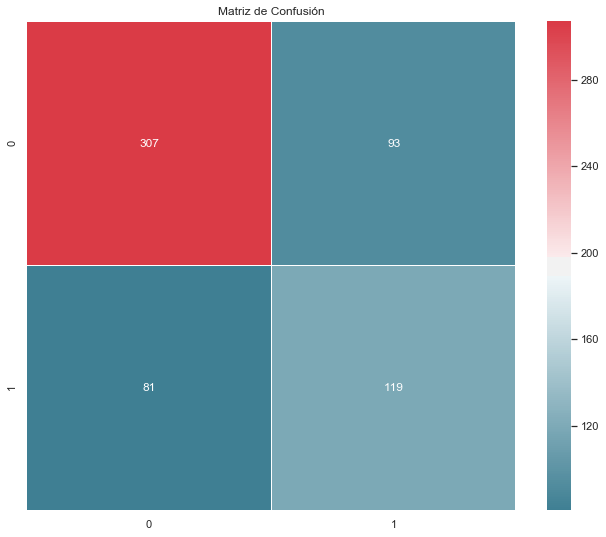

In [22]:
##########################
# Tabla de confusión
##########################
from sklearn.metrics import confusion_matrix, precision_score, recall_score 
from sklearn.metrics import f1_score, cohen_kappa_score
import seaborn as sns 

y_predict_es = model_es.predict([testX_es,testX_es,testX_es])

test_true_labels_es      = np.argmax(y_test_label_es, axis=1)
test_predicted_labels_es = np.argmax(y_predict_es,axis=1)


%matplotlib inline
C = confusion_matrix(test_true_labels_es, test_predicted_labels_es)
print(C)

##########################
# F1
##########################
print('F1 test:', f1_score(test_true_labels_es, test_predicted_labels_es,  average='macro'))


f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(C, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Matriz de Confusión')
plt.show()


#  0.6784288600857523 semilla 9 epocas

In [21]:
from keras.models import load_model
DATA_PATH='C:\\Users\\h_air\\Documents\\Diplomado Deep Learning\\Estancia\\Datos\\Datos\\'
#model_es.save(DATA_PATH+'Cnn_es.h5')

model_es = load_model(DATA_PATH+'Cnn_es.h5') # Cargar

In [29]:
from keras.utils.vis_utils import plot_model
plot_model(model_es, show_shapes=True, to_file=DATA_PATH+'Cnn_es.png')

### Clasificación CNN Cuba

In [23]:
# one hot representación targets
from keras.utils import to_categorical
y_train_label_cu = to_categorical(y_train_cu)
y_test_label_cu  = to_categorical(y_test_cu)

In [24]:
from keras import backend as K
# define the model
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [33]:
def define_model_cu1(length, vocab_size, n ):
    

	# channel 1
	np.random.seed(n)
	inputs1 = Input(shape=(length,))
	embedding1 = Embedding(vocab_size, 300)(inputs1)
	conv1 = Conv1D(filters=100, kernel_size=4, activation='relu')(embedding1)
	pool1 = GlobalMaxPooling1D()(conv1)
	drop1 = Dropout(0.5)(pool1) 
	# channel 2
	np.random.seed(n)
	inputs2 = Input(shape=(length,))
	embedding2 = Embedding(vocab_size, 300)(inputs2)   
	conv2 = Conv1D(filters=100, kernel_size=6, activation='relu')(embedding2)
	pool2 = GlobalMaxPooling1D()(conv2)
	drop2 = Dropout(0.5)(pool2) 
	# channel 3
	np.random.seed(n)
	inputs3 = Input(shape=(length,))
	embedding3 = Embedding(vocab_size, 300)(inputs3)   
	conv3 = Conv1D(filters=100, kernel_size=8, activation='relu')(embedding3)
	pool3 = GlobalMaxPooling1D()(conv3)
	drop3 = Dropout(0.5)(pool3) 
	# merge
	merged = concatenate([pool1, pool2, pool3])
	# interpretation
	dense1 = Dense(10, activation='relu')(merged)
	outputs = Dense(2, activation='softmax')(dense1)
	model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
	# compile
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# summarize
	print(model.summary())
	return model

In [34]:
from sklearn.utils import class_weight
class_weights_cu = class_weight.compute_class_weight('balanced',
                                                 np.unique(array(y_train_label_cu)),
                                                 y_train_cu)

In [35]:
del model_cu, hist_cu

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 41)           0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            (None, 41)           0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 41)           0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 41, 300)      2791200     input_4[0][0]                    
__________________________________________________________________________________________________
embedding_

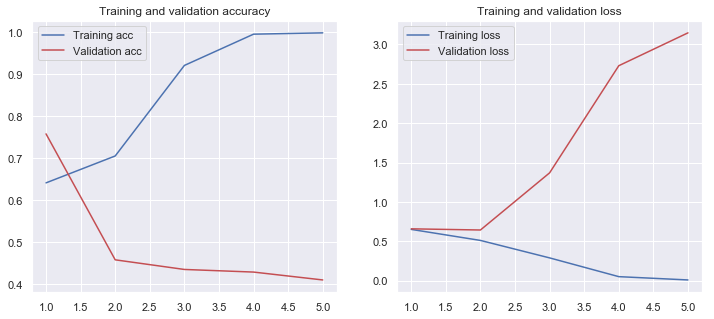

In [36]:
model_cu = define_model_cu1(length_cu, vocab_size_cu, 17) 
# fit model


hist_cu = model_cu.fit([trainX_cu,trainX_cu,trainX_cu], array(y_train_label_cu), epochs=5, batch_size=50, validation_split=.2,
                      class_weight = class_weights_cu)

def plot_history(history):
        acc = history.history["acc"]
        val_acc = history.history["val_acc"]
        loss = history.history["loss"]
        val_loss = history.history["val_loss"]
        x = range(1, len(acc) + 1)

        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(x, acc, "b", label="Training acc")
        plt.plot(x, val_acc, "r", label="Validation acc")
        plt.title("Training and validation accuracy")
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.plot(x, loss, "b", label="Training loss")
        plt.plot(x, val_loss, "r", label="Validation loss")
        plt.title("Training and validation loss")
        plt.legend()
    
plot_history(history=hist_cu)

[[277 123]
 [103  97]]
F1 test: 0.5860805860805861


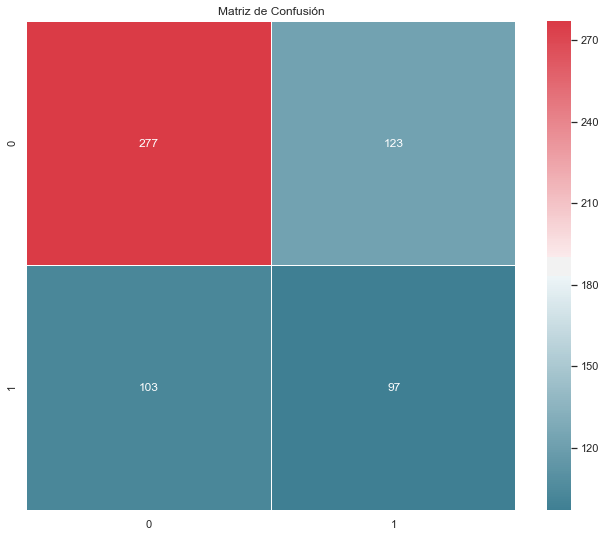

In [25]:
##########################
# Tabla de confusión
##########################
from sklearn.metrics import confusion_matrix, precision_score, recall_score 
from sklearn.metrics import f1_score, cohen_kappa_score
import seaborn as sns 

y_predict_cu = model_cu.predict([testX_cu,testX_cu,testX_cu])

test_true_labels_cu      = np.argmax(y_test_label_cu, axis=1)
test_predicted_labels_cu = np.argmax(y_predict_cu,axis=1)


%matplotlib inline
C = confusion_matrix(test_true_labels_cu, test_predicted_labels_cu)
print(C)

##########################
# F1
##########################
print('F1 test:', f1_score(test_true_labels_cu, test_predicted_labels_cu,  average='macro'))


f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(C, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Matriz de Confusión')
plt.show()

# F1 test 0.5860805860805861 seed 17 epoca 5

In [24]:
from keras.models import load_model
#DATA_PATH='C:\\Users\\h_air\\Documents\\Diplomado Deep Learning\\Estancia\\Datos\\Datos\\'
#model_cu.save(DATA_PATH+'Cnn_cu.h5')

model_cu = load_model(DATA_PATH+'Cnn_cu.h5') # Cargar

#from keras.utils.vis_utils import plot_model
#plot_model(model_cu, show_shapes=True, to_file=DATA_PATH+'Cnn_cu.png')

In [26]:
del modelo_google

# Word2Vec Pesos (entrenables)

## México

In [27]:
# define the model
def define_model_mx1_w2v(length, vocab_size, n , weights):
	# channel 1
	np.random.seed(n)
	inputs1 = Input(shape=(length,))
	embedding1 = Embedding(vocab_size, 300, weights=[weights], trainable=True)(inputs1)
	conv1 = Conv1D(filters=100, kernel_size=4, activation='relu')(embedding1)
	pool1 = GlobalMaxPooling1D()(conv1)
	drop1 = Dropout(0.5)(pool1) 
	# channel 2
	np.random.seed(n)
	inputs2 = Input(shape=(length,))
	embedding2 = Embedding(vocab_size, 300, weights=[weights], trainable=True)(inputs2)   
	conv2 = Conv1D(filters=100, kernel_size=6, activation='relu')(embedding2)
	pool2 = GlobalMaxPooling1D()(conv2)
	drop2 = Dropout(0.5)(pool2) 
	# channel 3
	np.random.seed(n)
	inputs3 = Input(shape=(length,))
	embedding3 = Embedding(vocab_size, 300, weights=[weights], trainable=True)(inputs3)   
	conv3 = Conv1D(filters=100, kernel_size=8, activation='relu')(embedding3)
	pool3 = GlobalMaxPooling1D()(conv3)
	drop3 = Dropout(0.5)(pool3) 
	# merge
	merged = concatenate([pool1, pool2, pool3])
	# interpretation
	dense1 = Dense(10, activation='relu')(merged)
	outputs = Dense(2, activation='softmax')(dense1)
	model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
	# compile
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# summarize
	print(model.summary())
	
	return model

In [28]:
del model_mx_w2v, hist_mx_w2v

In [44]:
from sklearn.utils import class_weight
class_weights_mx = class_weight.compute_class_weight('balanced',
                                                 np.unique(array(y_train_label_mx)),
                                                 y_train)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 36)           0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            (None, 36)           0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            (None, 36)           0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 36, 300)      2484300     input_7[0][0]                    
__________________________________________________________________________________________________
embedding_

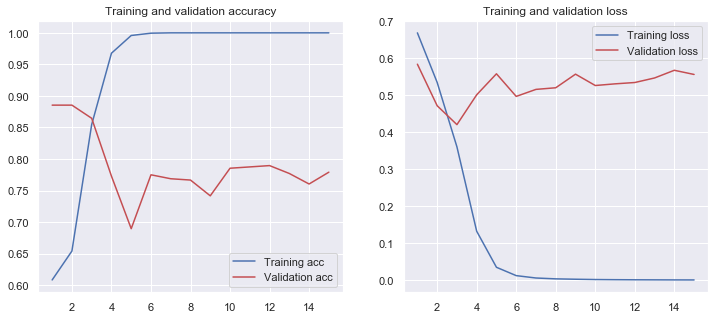

In [45]:


model_mx_w2v = define_model_mx1_w2v(length_mx, vocab_size_mx, 17, weights_mx) #16
# fit model


hist_mx_w2v = model_mx_w2v.fit([trainX_mx,trainX_mx,trainX_mx], array(y_train_label_mx), epochs=15, batch_size=50,
                               validation_split=.2, class_weight=class_weights_mx)

def plot_history(history):
        acc = history.history["acc"]
        val_acc = history.history["val_acc"]
        loss = history.history["loss"]
        val_loss = history.history["val_loss"]
        x = range(1, len(acc) + 1)

        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(x, acc, "b", label="Training acc")
        plt.plot(x, val_acc, "r", label="Validation acc")
        plt.title("Training and validation accuracy")
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.plot(x, loss, "b", label="Training loss")
        plt.plot(x, val_loss, "r", label="Validation loss")
        plt.title("Training and validation loss")
        plt.legend()
    
plot_history(history=hist_mx_w2v)




[[352  49]
 [125  74]]
F1 test: 0.6307248263274806


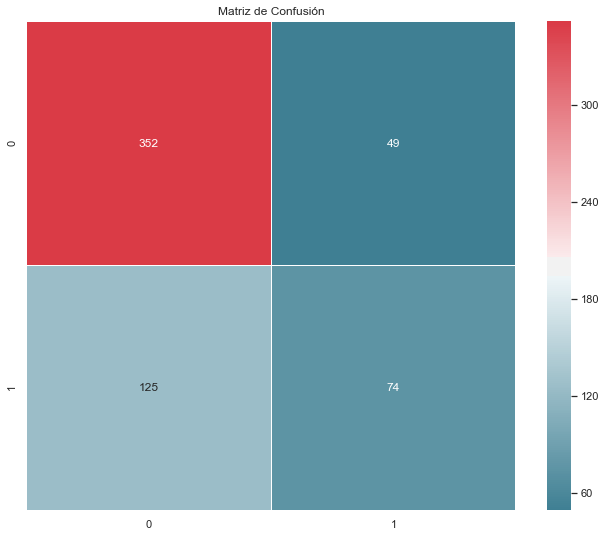

In [30]:
##########################
# Tabla de confusión
##########################
from sklearn.metrics import confusion_matrix, precision_score, recall_score 
from sklearn.metrics import f1_score, cohen_kappa_score
import seaborn as sns 

y_predict_mx_w2v = model_mx_w2v.predict([testX_mx,testX_mx,testX_mx])

test_true_labels_mx_w2v      = np.argmax(y_test_label_mx, axis=1)
test_predicted_labels_mx_w2v = np.argmax(y_predict_mx_w2v,axis=1)


%matplotlib inline
C = confusion_matrix(test_true_labels_mx_w2v, test_predicted_labels_mx_w2v)
print(C)

##########################
# F1
##########################
print('F1 test:', f1_score(test_true_labels_mx_w2v, test_predicted_labels_mx_w2v,  average='macro'))


f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(C, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Matriz de Confusión')
plt.show()



#0.6307248263274806  con 15 epocas y 17 semillas

In [29]:

from keras.models import load_model
DATA_PATH='C:\\Users\\h_air\\Documents\\Diplomado Deep Learning\\Estancia\\Datos\\Datos\\'
#model_mx_w2v.save(DATA_PATH+'Cnn_mx_w2v.h5')

model_mx_w2v = load_model(DATA_PATH+'Cnn_mx_w2v.h5') # Cargar

#from keras.utils.vis_utils import plot_model
#plot_model(model_mx_w2v, show_shapes=True, to_file=DATA_PATH+'Cnn_mx_w2v.png')

## España

In [79]:
# define the model
def define_model_es1_w2v(length, vocab_size, n , weights):
    
	# channel 1
	np.random.seed(n)
	inputs1 = Input(shape=(length,))
	embedding1 = Embedding(vocab_size, 300, weights=[weights], trainable=True)(inputs1)
	conv1 = Conv1D(filters=100, kernel_size=4, activation='relu')(embedding1)
	pool1 = GlobalMaxPooling1D()(conv1)
	drop1 = Dropout(0.5)(pool1) 
	# channel 2
	np.random.seed(n)
	inputs2 = Input(shape=(length,))
	embedding2 = Embedding(vocab_size, 300, weights=[weights], trainable=True)(inputs2)   
	conv2 = Conv1D(filters=100, kernel_size=6, activation='relu')(embedding2)
	pool2 = GlobalMaxPooling1D()(conv2)
	drop2 = Dropout(0.5)(pool2) 
	# channel 3
	np.random.seed(n)
	inputs3 = Input(shape=(length,))
	embedding3 = Embedding(vocab_size, 300, weights=[weights], trainable=True)(inputs3)   
	conv3 = Conv1D(filters=100, kernel_size=8, activation='relu')(embedding3)
	pool3 = GlobalMaxPooling1D()(conv3)
	drop3 = Dropout(0.5)(pool3) 
	# merge
	merged = concatenate([pool1, pool2, pool3])
	# interpretation
	dense1 = Dense(10, activation='relu')(merged)
	outputs = Dense(2, activation='softmax')(dense1)
	model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
	# compile
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# summarize
	print(model.summary())
	
	return model

In [69]:
from sklearn.utils import class_weight
class_weights_es = class_weight.compute_class_weight('balanced',
                                                 np.unique(array(y_train_label_es)),
                                                 y_train_es)


In [98]:
del model_es_w2v, hist_es_w2v

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_43 (InputLayer)           (None, 38)           0                                            
__________________________________________________________________________________________________
input_44 (InputLayer)           (None, 38)           0                                            
__________________________________________________________________________________________________
input_45 (InputLayer)           (None, 38)           0                                            
__________________________________________________________________________________________________
embedding_43 (Embedding)        (None, 38, 300)      2098500     input_43[0][0]                   
__________________________________________________________________________________________________
embedding_

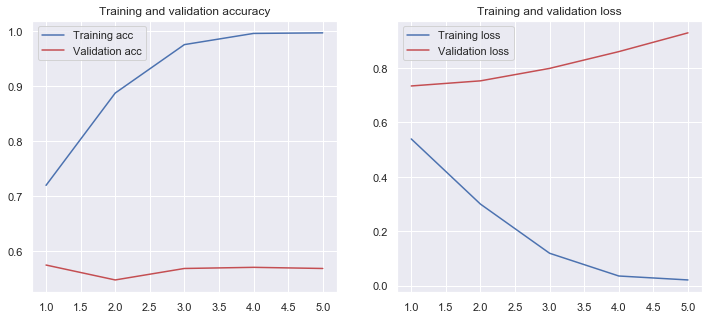

In [102]:

model_es_w2v = define_model_es1_w2v(length_es, vocab_size_es, 16, weights_es) 
# fit model


hist_es_w2v = model_es_w2v.fit([trainX_es,trainX_es,trainX_es], array(y_train_label_es), epochs=5, batch_size=50, 
                               validation_split=.2, class_weight = class_weights_es)

def plot_history(history):
        acc = history.history["acc"]
        val_acc = history.history["val_acc"]
        loss = history.history["loss"]
        val_loss = history.history["val_loss"]
        x = range(1, len(acc) + 1)

        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(x, acc, "b", label="Training acc")
        plt.plot(x, val_acc, "r", label="Validation acc")
        plt.title("Training and validation accuracy")
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.plot(x, loss, "b", label="Training loss")
        plt.plot(x, val_loss, "r", label="Validation loss")
        plt.title("Training and validation loss")
        plt.legend()
    
plot_history(history=hist_es_w2v)

[[308  92]
 [102  98]]
F1 test: 0.6315289648622984


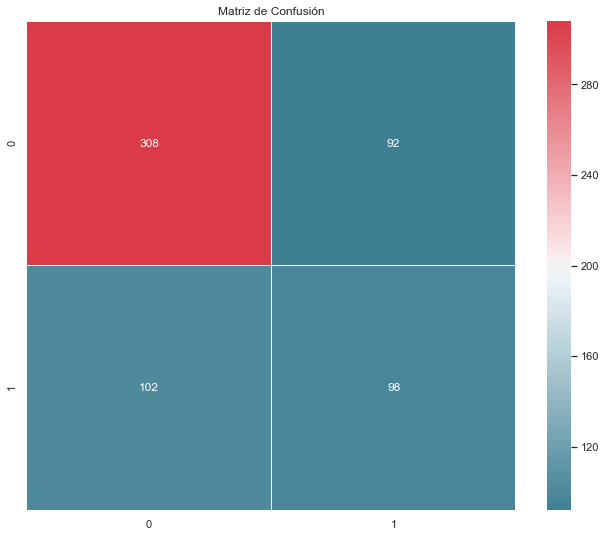

In [32]:
##########################
# Tabla de confusión
##########################
from sklearn.metrics import confusion_matrix, precision_score, recall_score 
from sklearn.metrics import f1_score, cohen_kappa_score
import seaborn as sns 

y_predict_es_w2v = model_es_w2v.predict([testX_es,testX_es,testX_es])

test_true_labels_es_w2v      = np.argmax(y_test_label_es, axis=1)
test_predicted_labels_es_w2v = np.argmax(y_predict_es_w2v,axis=1)


%matplotlib inline
C = confusion_matrix(test_true_labels_es_w2v, test_predicted_labels_es_w2v)
print(C)

##########################
# F1
##########################
print('F1 test:', f1_score(test_true_labels_es_w2v, test_predicted_labels_es_w2v,  average='macro'))


f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(C, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Matriz de Confusión')
plt.show()

#  0.6315289648622984 semilla 16 epoca 5

In [31]:

from keras.models import load_model
DATA_PATH='C:\\Users\\h_air\\Documents\\Diplomado Deep Learning\\Estancia\\Datos\\Datos\\'
#model_es_w2v.save(DATA_PATH+'Cnn_es_w2v.h5')

model_es_w2v = load_model(DATA_PATH+'Cnn_es_w2v.h5') # Cargar

#from keras.utils.vis_utils import plot_model
#plot_model(model_es_w2v, show_shapes=True, to_file=DATA_PATH+'Cnn_es_w2v.png')

# Cuba

In [106]:
# define the model
def define_model_cu1_w2v(length, vocab_size, n , weights):
    


	# channel 1
	np.random.seed(n)
	inputs1 = Input(shape=(length,))
	embedding1 = Embedding(vocab_size, 300, weights=[weights], trainable=True)(inputs1)
	conv1 = Conv1D(filters=100, kernel_size=4, activation='relu')(embedding1)
	pool1 = GlobalMaxPooling1D()(conv1)
	drop1 = Dropout(0.5)(pool1) 
	# channel 2
	np.random.seed(n)
	inputs2 = Input(shape=(length,))
	embedding2 = Embedding(vocab_size, 300, weights=[weights], trainable=True)(inputs2)   
	conv2 = Conv1D(filters=100, kernel_size=6, activation='relu')(embedding2)
	pool2 = GlobalMaxPooling1D()(conv2)
	drop2 = Dropout(0.5)(pool2) 
	# channel 3
	np.random.seed(n)
	inputs3 = Input(shape=(length,))
	embedding3 = Embedding(vocab_size, 300, weights=[weights], trainable=True)(inputs3)   
	conv3 = Conv1D(filters=100, kernel_size=8, activation='relu')(embedding3)
	pool3 = GlobalMaxPooling1D()(conv3)
	drop3 = Dropout(0.5)(pool3) 
	# merge
	merged = concatenate([pool1, pool2, pool3])
	# interpretation
	dense1 = Dense(10, activation='relu')(merged)
	outputs = Dense(2, activation='softmax')(dense1)
	model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
	# compile
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# summarize
	print(model.summary())
	
	
	return model

In [107]:
from sklearn.utils import class_weight
class_weights_cu = class_weight.compute_class_weight('balanced',
                                                 np.unique(array(y_train_label_cu)),
                                                 y_train_cu)


In [127]:
del model_cu_w2v, hist_cu_w2v

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_64 (InputLayer)           (None, 41)           0                                            
__________________________________________________________________________________________________
input_65 (InputLayer)           (None, 41)           0                                            
__________________________________________________________________________________________________
input_66 (InputLayer)           (None, 41)           0                                            
__________________________________________________________________________________________________
embedding_64 (Embedding)        (None, 41, 300)      2791200     input_64[0][0]                   
__________________________________________________________________________________________________
embedding_

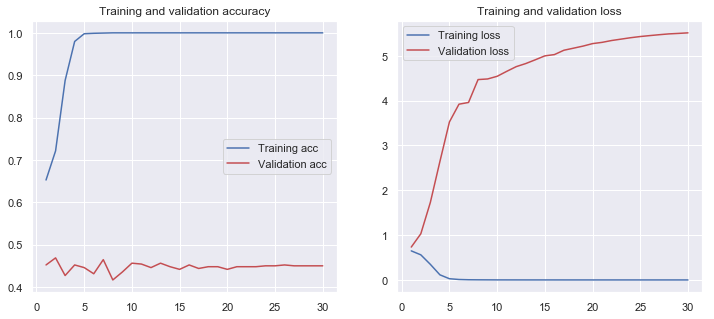

In [128]:
model_cu_w2v = define_model_cu1_w2v(length_cu, vocab_size_cu, 16, weights_cu) 
# fit model


hist_cu_w2v = model_cu_w2v.fit([trainX_cu,trainX_cu,trainX_cu], array(y_train_label_cu), epochs=30, batch_size=50, 
                               validation_split=.2, class_weight = class_weights_cu )

def plot_history(history):
        acc = history.history["acc"]
        val_acc = history.history["val_acc"]
        loss = history.history["loss"]
        val_loss = history.history["val_loss"]
        x = range(1, len(acc) + 1)

        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(x, acc, "b", label="Training acc")
        plt.plot(x, val_acc, "r", label="Validation acc")
        plt.title("Training and validation accuracy")
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.plot(x, loss, "b", label="Training loss")
        plt.plot(x, val_loss, "r", label="Validation loss")
        plt.title("Training and validation loss")
        plt.legend()
    
plot_history(history=hist_cu_w2v)

[[317  83]
 [135  65]]
F1 test: 0.5588473368949328


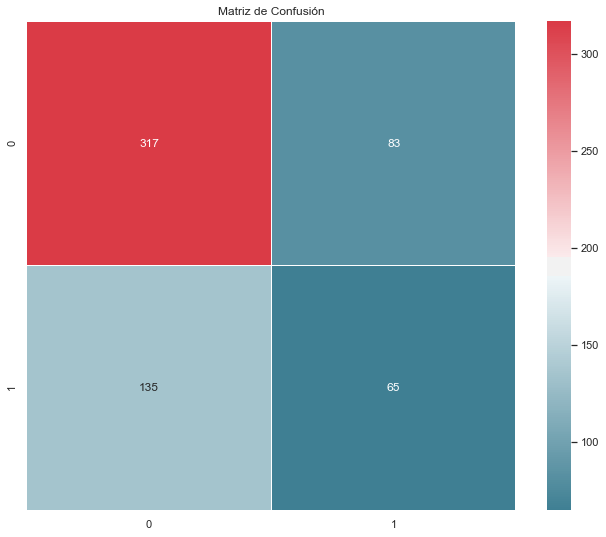

In [37]:
##########################
# Tabla de confusión
##########################
from sklearn.metrics import confusion_matrix, precision_score, recall_score 
from sklearn.metrics import f1_score, cohen_kappa_score
import seaborn as sns 

y_predict_cu_w2v = model_cu_w2v.predict([testX_cu,testX_cu,testX_cu])

test_true_labels_cu_w2v      = np.argmax(y_test_label_cu, axis=1)
test_predicted_labels_cu_w2v = np.argmax(y_predict_cu_w2v,axis=1)


%matplotlib inline
C = confusion_matrix(test_true_labels_cu_w2v, test_predicted_labels_cu_w2v)
print(C)

##########################
# F1
##########################
print('F1 test:', f1_score(test_true_labels_cu_w2v, test_predicted_labels_cu_w2v,  average='macro'))


f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(C, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Matriz de Confusión')
plt.show()

#   0.5588473368949328 con 30 epocas semilla 17


In [36]:
from keras.models import load_model
DATA_PATH='C:\\Users\\h_air\\Documents\\Diplomado Deep Learning\\Estancia\\Datos\\Datos\\'
#model_cu_w2v.save(DATA_PATH+'Cnn_cu_w2v.h5')

model_cu_w2v = load_model(DATA_PATH+'Cnn_cu_w2v.h5') # Cargar

#from keras.utils.vis_utils import plot_model
#plot_model(model_cu_w2v, show_shapes=True, to_file=DATA_PATH+'Cnn_cu_w2v.png')

# Resultados

In [40]:
Tabla= {'País':['México', 'España', 'Cuba'],
        'CNN_chanels3':[f1_score(test_true_labels_mx, test_predicted_labels_mx,  average='macro'), 
                    f1_score(test_true_labels_es, test_predicted_labels_es,  average='macro'), 
                      f1_score(test_true_labels_cu, test_predicted_labels_cu,  average='macro')],
        'CNN_chanels3-W2VGoogle':[f1_score(test_true_labels_mx_w2v, test_predicted_labels_mx_w2v,  average='macro'), 
                     f1_score(test_true_labels_es_w2v, test_predicted_labels_es_w2v,  average='macro'), 
                     f1_score(test_true_labels_cu_w2v, test_predicted_labels_cu_w2v,  average='macro')]}
 
# Create DataFrame
Tabla = pd.DataFrame(Tabla)
Tabla

,País,CNN_chanels3,CNN_chanels3-W2VGoogle
0,México,0.636071,0.630725
1,España,0.678429,0.631529
2,Cuba,0.586081,0.558847
